# Problem Statement:

### To devise a campaign for selling Personal Loans

**Say SBI being the largest commercial bank in India with 42 crore customer base wants to devise a campaing for selling personal loan.** 

    1. What would be its ideal strategy?

    2. Will the bank contact each one of 42 crore customers for personal loan? If so, what would be the cost associated with this?

    3. How do they devise campaings?

**Given:** A campaign that the bank ran last year for liability customers (depositors) showed a healthy conversion rate of over 9% 

**Business Objective:**

    **To devise a campaign with better target marketing to increase the success ratio with minimal budget.**
    (Build a Machine Learning model that will help them identify the potential customers who have higher probability of purchasing the loan.)

Steps:
1. Acquire data
2. Clean data
3. Exploratory Data Analysis
4. Standardise data
5. Split data into Train & Test sets
6. Create & Train Model
7. Model Evaluation

# Data Source
Bank_Personal_Loan_Modelling-1.xlsx

# Data Dictionary

1. ID - Customer ID (Unique ID)
2. Age - Customer's age in completed years (Numeric - Continuous variable)
3. Experience - #years of professional experience (Numeric - Continuous variable)
4. Income - Annual income of the customer (in 1000s) (Numeric - Continuous variable)
5. ZIPCode - Home Address ZIP code 
6. Family - Family size of the customer (Numeric - Discrete variable) 
7. CCAvg - Avg. spending on credit cards per month (in 1000s) (Numeric - Continuous variable)
8. Education - Education Level 1: Undergrad; 2: Graduate; 3: Advanced/Professional (Categorical variable)
9. Mortgage - Value of house mortgage if any (in 1000s) (Numeric - Continuous variable)
10. **Personal Loan** - Did this customer accept the personal loan offered in the last campaign (0/1)? (Categorical data)- This is our **Target Variable**
11. Securities Account - Does the customer have a securities account with the bank? (0/1) (Categorical data)
12. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (0/1) (Categorical data)
13. Online - Does the customer use internet banking facilities? (0/1) (Categorical data)
14. CreditCard - Does the customer use a credit card issued by UniversalBank? (0/1)(Categorical data)

There are 14 attributes in the dataset

**y** = **Personal Loan** will be our **Target/Response/Dependent variable**

**X** = Remaining features will be considered as **Independent/Predictor/Explanatory variables** (Note- Customer ID, ZIPCode variables will be dropped)

# Import Libraries

In [1]:
# Pandas is a package for data manipulation and analysis
import pandas as pd

# Numpy is a package for scientific computing (multi-dimensional arrays, matrices, mathematical functions)
import numpy as np

# matplotlib.pyplot is a collection of functions in Python that make matplotlib work like MATLAB
# (MATLAB - high performing language for technical computing used in application development, GUI building)
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library for statistical graphics
import seaborn as sns

# Classifier
from sklearn.linear_model import LogisticRegression

# Importing few functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Magic function which displays plots directly below the code cell in jupyter notebook
%matplotlib inline

# Acquire Data

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx', sheetname='Data')

C:\Users\roopa\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace=True)

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Check for missing values
print('Number of missing values across columns-\n', df.isnull().sum())

Number of missing values across columns-
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


##### If there are any missing vlues, we impute missing values with mean, median, mode or algorithmic imputation

In [8]:
df = df.drop(['ID', 'ZIP Code'], axis=1)
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# Summary Statistics

In [9]:
# Only consider numeric variables for summary statistics

temp_df = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]


In [10]:
# Summary Statistics for numeric data

temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


Observations-
1. Experience fields has some negative values which needs to be handled
2. Based on Max value of Income, CCAvg, Mortgage - Suspect Outliers (which will be investigated during the excercise)

# Exploratory Data Analysis

In [11]:
# Box plot (Five Number Summary) to identify outliers

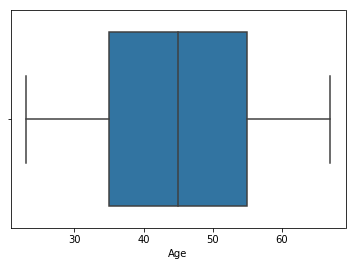

In [12]:
sns.boxplot(x='Age', data=df)

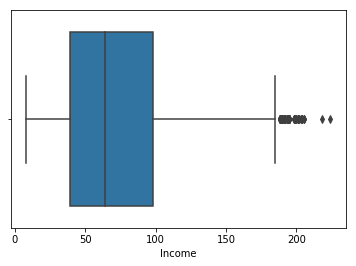

In [13]:
sns.boxplot(x='Income', data=df)

##### Observation:
There are few outliers in **'Income'** variable so it needs to be treated.

In [14]:
# Understanding categorical variables
personal_loan = np.array(df['Personal_Loan'])
family = np.array(df['Family'])
education = np.array(df['Education'])
sec_acc = np.array(df['Securities Account'])
cd_acc = np.array(df['CD Account'])
online = np.array(df['Online'])
credit_card = np.array(df['CreditCard'])

In [15]:
pd.crosstab(personal_loan, family, rownames=['Personal_Loan'], colnames=['Family size']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Family size,1,2,3,4
Personal_Loan,,,,
0,92.73,91.82,86.83,89.03
1,7.27,8.18,13.17,10.97


##### Observation: 
1. **7.27%** of customers with **Family size = 1** had accepted the personal loan offered in the previous campaign.
2. **8.18%** of customers with **Family size = 2** had accepted the personal loan offered in the previous campaign.
3. **13.17%** of customers with **Family size = 3** had accepted the personal loan offered in the previous campaign.
4. **10.97%** of customers with **Family size = 4** had accepted the personal loan offered in the previous campaign.

In [16]:
pd.crosstab(personal_loan, education, rownames=['Personal_Loan'], colnames=['Education level']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Education level,1,2,3
Personal_Loan,,,
0,95.56,87.03,86.34
1,4.44,12.97,13.66


##### Observation: 
1. **4.44%** of customers with **Education level = 1 (Undergrad)** had accepted the personal loan offered in the previous campaign.
2. **12.97%** of customers with **Education level = 2 (Graduate)** had accepted the personal loan offered in the previous campaign.
3. **13.66%** of customers with **Education level = 3 (Advanced/Professional)** had accepted the personal loan offered in the previous campaign.

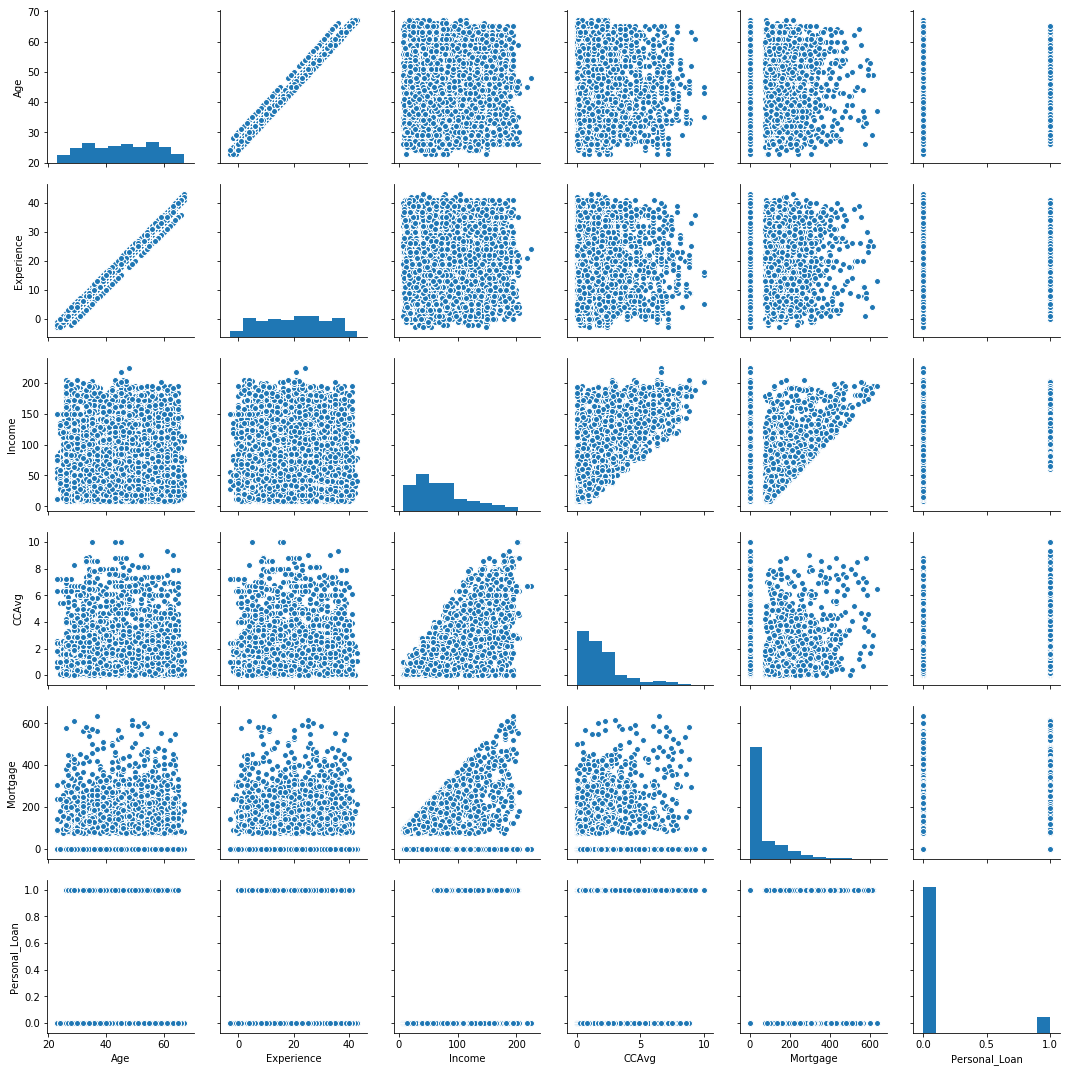

In [17]:
# Pair-plots of continuous variables

sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal_Loan']])

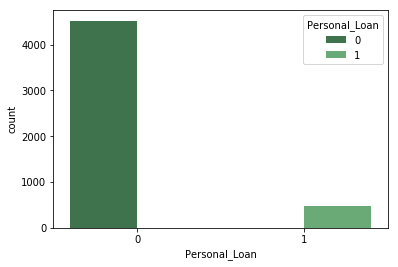

In [18]:
sns.countplot(x='Personal_Loan', data=df, palette="Greens_d", hue='Personal_Loan')

In [19]:
pd.value_counts(df['Personal_Loan'].values, sort=False)

0    4520
1     480
dtype: int64

**Only (480/5000) = 9.6% of customers accepted the personal loan offered in the last campaign.**

In [20]:
# Data before standardisation

df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [21]:
# Standardise data 

X_std = df.drop(['Personal_Loan'], axis=1).apply(lambda x: (x-np.mean(x))/(np.std(x)))

X_std.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193371,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250595,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536720,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,-1.216855,0.436103,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536720,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [22]:
y_labels = ['0', '1']

Text(0.5,1,'Correlation between different features of dataset\n')

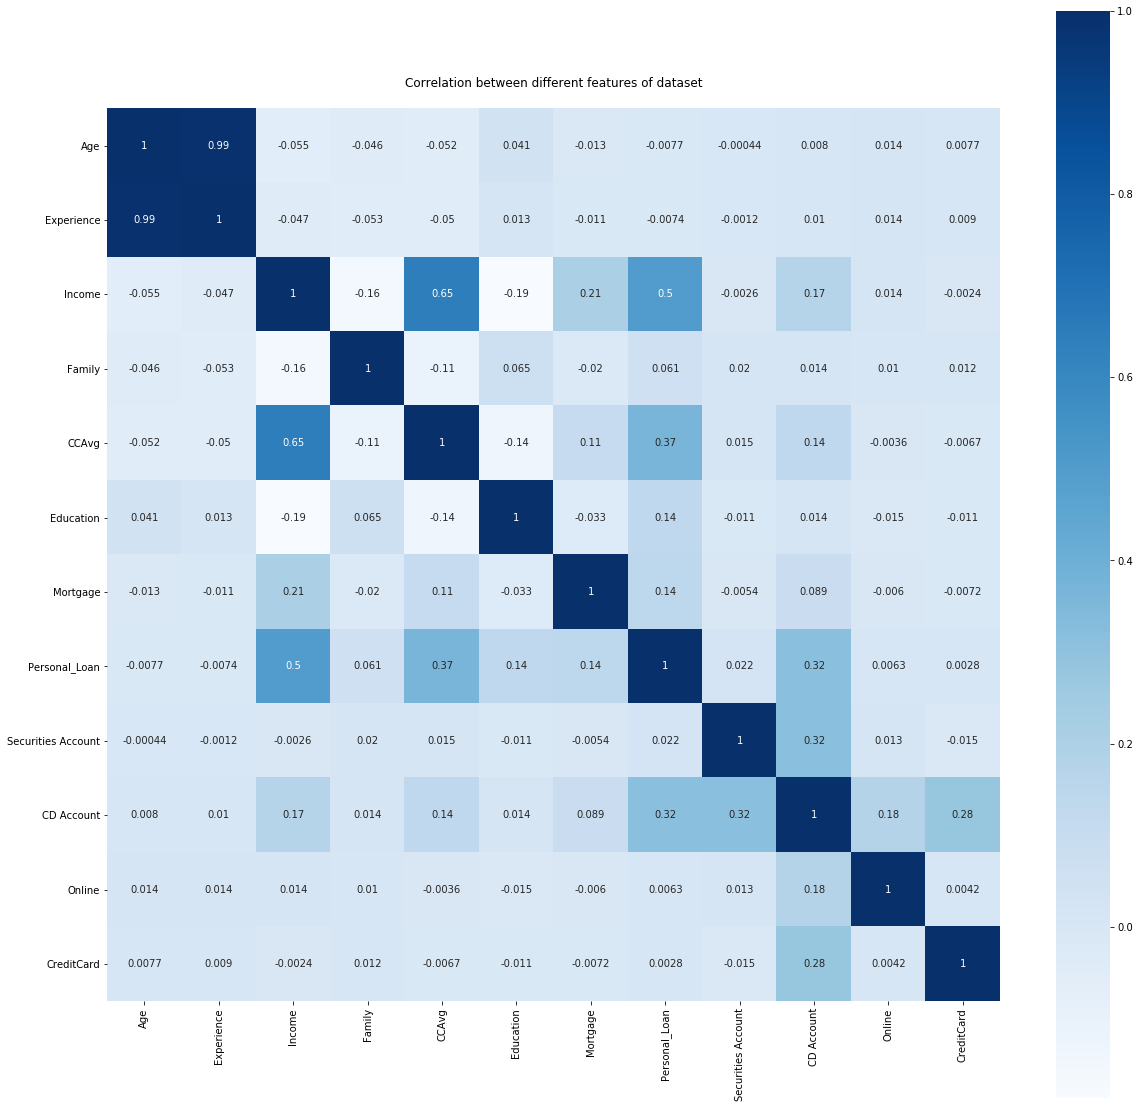

In [23]:
#Correlation matrix
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Correlation between different features of dataset\n')

##### Few Observations:
1. **Age** and **Experience** have very strong positive correlation of 0.99 (multicollinearity)
2. **Income** and **CCAvg** have strong positive correlation of 0.64

In [24]:
y = df['Personal_Loan']
X = X_std

### Splitting data into Train and Test set

In [25]:
# Splitting 70% of the records from the dataset for training and 30% for testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Logistic Regression model accuracy score =  0.95


[Text(0,0.5,'0'), Text(0,1.5,'1')]

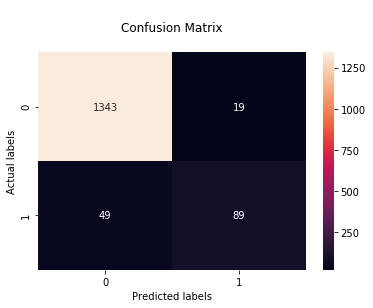

In [26]:
logit_model = LogisticRegression()
print(logit_model)

logit_model.fit(X_train, y_train)

predictions = logit_model.predict(X_test)

accuracy = logit_model.score(X_test, y_test)

print('\n\nLogistic Regression model accuracy score = ', round(accuracy, 2))


cm = metrics.confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

**Logistic Regression**

Advantages: 
1. Easily extended to multiple classes (multinomial regression) 
2. Natural probabilistic view of class predictions 
3. Quick to train 
4. Very fast at classifying unknown records 
5. Good accuracy for many simple data sets 
6. Resistant to overfitting 
7. Can interpret model coefficients as indicators of feature importance

Disadvantages: 
1. Constructs linear boundaries

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


K-Nearest Neighbors Classifier model accuracy score =  0.96


[Text(0,0.5,'0'), Text(0,1.5,'1')]

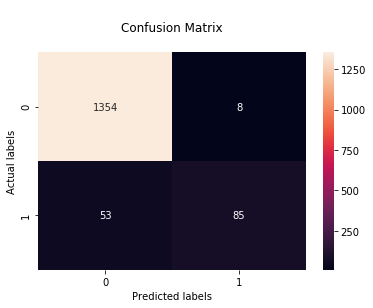

In [27]:
knn = KNeighborsClassifier()
print(knn)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)

print('\n\nK-Nearest Neighbors Classifier model accuracy score = ', round(accuracy, 2))


cm = metrics.confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

**K-Nearest Neighbors Classifer**

Advantages: 
1. Makes no assumptions about distributions of classes in feature space 
2. Can work for multi-classes simultaneously 
3. Easy to implement and understand 
4. Not impacted by outliers

Disadvantages: 
1. Fixing the optimal value of K is a challenge 
2. Will not be effective when the class distributions overlap 
3. Does not output any models. Calculates distances for every new point (lazy learner) 
4. Computationally intensive 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Support Vector Machine Classifier model accuracy score =  0.98


[Text(0,0.5,'0'), Text(0,1.5,'1')]

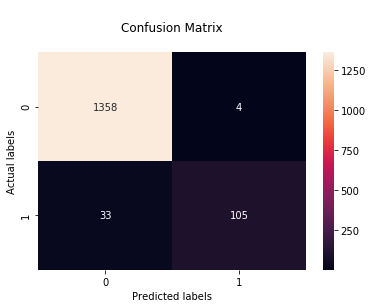

In [28]:
svmc = SVC()
print(svmc)

svmc.fit(X_train, y_train)

predictions = svmc.predict(X_test)

accuracy = svmc.score(X_test, y_test)

print('\n\nSupport Vector Machine Classifier model accuracy score = ', round(accuracy, 2))


cm = metrics.confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


**SVM Classifier**

Advantages:
1. Accuracy is very good
2. Works well on smaller cleaner datasets

Disadvatages:
1. It is not suited to larger datasets as the training time with SVMs can be high
2. Less effective on noisier datasets with overlapping classes


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Support Vector Machine Classifier model accuracy score =  0.99


[Text(0,0.5,'0'), Text(0,1.5,'1')]

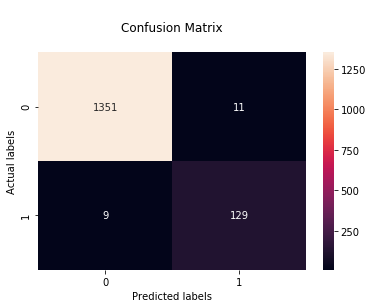

In [29]:
dt = DecisionTreeClassifier()
print(dt)

dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print('\n\nSupport Vector Machine Classifier model accuracy score = ', round(accuracy, 2))

cm = metrics.confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


**Decision Tree Classifier**

Advantages:
1. Simple, fast in processing and effective 
2. Does well with noisy data and missing data 
3. Handles numeric and categorical variables 
4. Interpretation of results does not require mathematical or statistical knowledge

Disadvantages:
1. Often biased towards splits or features 
2. Small changes in training data can result in large changes to the logic 
3. Large trees can be difficult to interpret 